# Python wrapper test

## Weibel simulation


In [1]:
import sys
sys.path.append('lib')

import em2d

sim = em2d.Simulation( [8,8], [16,16], [12.8,12.8], 0.07 )
%pdoc sim

# import em2d
#from em2d import laser

# The file has been extensively documented
# help( em2d.zpic.courant )

# All of the below commands work
import em2d.laser
pulse = em2d.laser.PlaneWave( start = 12.8, fwhm = 6.4, a0 = 1, omega0 = 8, sin_pol = 1)

import em2d.density
profile = em2d.density.Uniform( 2.0 )


# %pdoc laser
#laser?
# laser??

# You can get OpenMP / SIMD information using zpic.sys_info()
# em2d.zpic.sys_info()


Class docstring:
    Simulation( ntiles, nx, box, dt, species = None )
    
    Class representing an em2d simulation
    
    Parameters
    ----------
    ntiles : { int, int }
        Number of tiles (x,y) in the simulation grid
    nx : { int, int }
        Size (x,y) of individual tiles
    box : { float, float }
        Simulation box size (x,y) in simulation units
    dt : float
        Simulation time step in simulation units
    species : Species or list of Species
        Species or list of Species to be added to the simulation. Defaults to None,
        meaning no species will be used.
    moving_window : boolean
        Use a moving window for the simulation, defaults to False


### Prepare and run simulation

The `dims` variable corresponds to the global grid size. The cell size is set to $0.1^2$

In [2]:
import em2d
import em2d.udist

# Grid parameters
dims   = [ 128, 128 ]
ntiles = [ 8, 8 ]
box = [ 0.1 * dims[0], 0.1 * dims[1] ]

# Simulation time
tmax   = 35.0

# Particle species
electrons = em2d.Species( "electrons", -1, [4,4], 
                           udist = em2d.udist.ThermalCorr( [0.1, 0.1, 0.1], [ 0, 0, +0.6 ] ) )

positrons = em2d.Species( "positrons", +1, [4,4], 
                           udist = em2d.udist.ThermalCorr( [0.1, 0.1, 0.1], [ 0, 0, -0.6 ] ) )


# Create simulation object
nx = [ dims[0]/ntiles[0], dims[1]/ntiles[1] ]
dt = 0.07
sim = em2d.Simulation( ntiles, nx, box, dt, species = [electrons, positrons] )

# Iterate up to tmax
while sim.t < tmax:
    sim.advance()

print( "Simulation run up to t = {}".format(sim.t))

Simulation run up to t = 35.0


### Plot data directly from memory

Simulation objects have `plot`/`vplot` methods that may be called for generating a plot similar to what you would obtain by saving the file and opening it through `visxd`.

(*info*) Energy at n = 500, t = 35
(*info*) electrons = 14.293
(*info*) positrons = 14.3849
(*info*) Total particle energy = 28.6779
(*info*) Electric field = 4023.94
(*info*) Magnetic field = 1895.77
(*info*) total = 5948.39


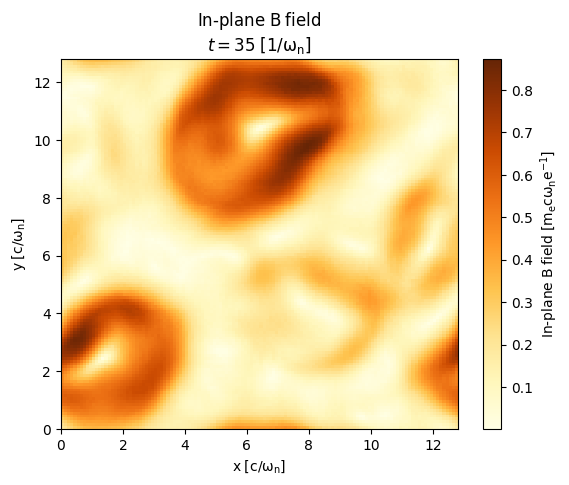

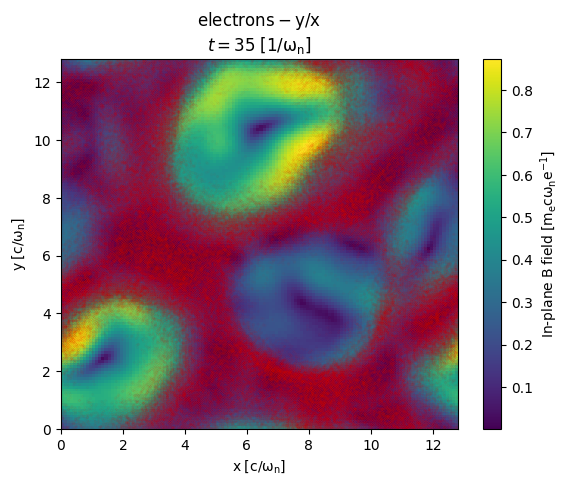

In [3]:
# Print energy information
sim.energy_info()

# sim.emf.plot('E','x', vsim = True, cmap = "RdYlBu")
sim.emf.vplot('B', cmap = "YlOrBr")

# sim.current.vplot()

# Overlap particle data
sim.emf.vplot('B', show = False)
electrons.plot( 'x', 'y', c = 'r', grid = False )

### Access simulation data

Data is returned as NumPy arrays. Note that the data is copied from simulation memory each time the `gather()` functions are called.

In [ ]:
Bx = sim.emf.B.gather('x')

Jz = sim.current.J.gather('z')

e_ux = electrons.gather('ux')
e_ux

### Save data to disk

Simulation data can be saved to disk for further analysis.

In [ ]:
sim.emf.save('B','x')
sim.emf.save('B','y')
sim.emf.save('B','z')

sim.current.save( 'z' )

# Save particle data
electrons.save()

## LWFA simulation

In [2]:
import em2d
import em2d.density
import em2d.laser

# Grid parameters
dims   = [ 1024, 128 ]
ntiles = [ 8, 8 ]
box = [ 20.48, 25.6 ]

# Simulation time
dt = em2d.zpic.courant( dims = dims, box = box ) * 0.9
tmax   = 22.0

# Particle species
electrons = em2d.Species( "electrons", -1, [2,2], 
                           density = em2d.density.Step( 'x', 1.0, 20.48 ) )

# Create simulation object
nx = [ dims[0]/ntiles[0], dims[1]/ntiles[1] ]
sim = em2d.Simulation( ntiles, nx, box, dt, species = electrons, moving_window = True )

# Add laser
sim.add( em2d.laser.Gaussian( 
    start = 17.0, fwhm = 2.0, a0 = 2.0, omega0 = 10.0, 
    W0 = 4.0, focus = 20.0, axis = 12.8, sin_pol = 1 ) )

# Iterate up to tmax
while sim.t < tmax:
    sim.advance()

print( "Simulation run up to t = {}".format(sim.t))

Simulation run up to t = 22.012211741879582


### Plot simulation results

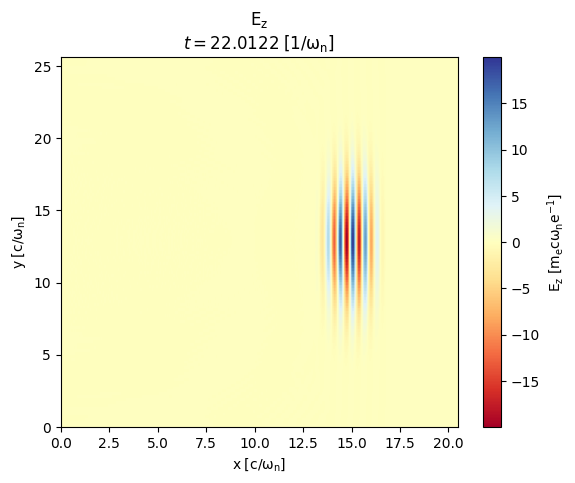

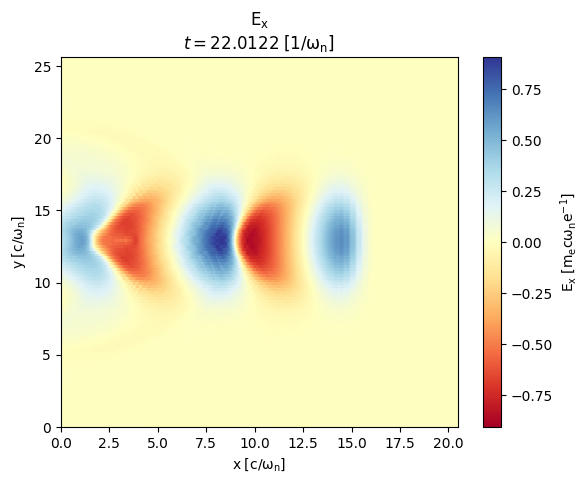

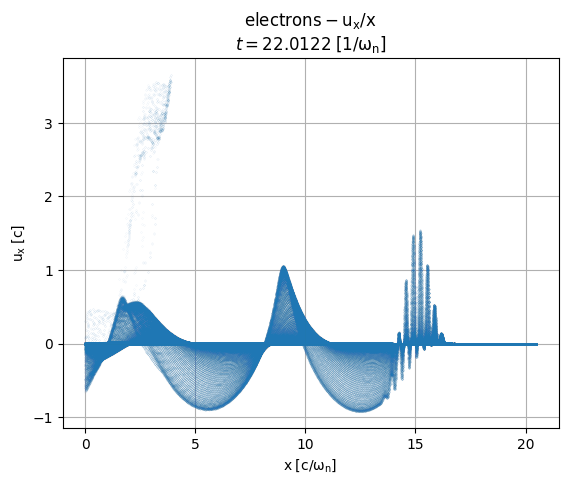

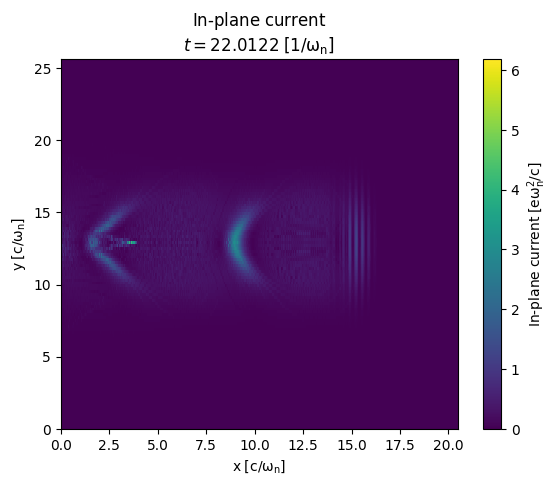

In [5]:
sim.emf.plot('E','z', vsim = True, cmap = "RdYlBu")
sim.emf.plot('E','x', vsim = True, cmap = "RdYlBu")

electrons.plot( 'x', 'ux' )

sim.current.vplot()